In [13]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from PIL import Image

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

from pathlib import Path
from math import ceil
from functools import partial
from io import BytesIO

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from skimage import color
from sklearn.cluster import KMeans, AgglomerativeClustering

from typing import Union, Callable

import glob
import os
import os.path
import joblib

import pandas as pd
import colorsys
from IPython.display import display

In [14]:
import img_rgb as classifier

In [15]:
def acquire_files(mypath):
    onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
    return onlyfiles

def load_palette(mypath, batch, onlyfiles):

    buffer = np.random.randint(0, int(len(onlyfiles) - batch))
    palette_list = []
    for i in range(buffer, buffer + batch):
        palette = classifier.pallete(mypath + "/" + onlyfiles[i])
        palette_list.append(palette)

    return palette_list

In [29]:
# scoring_regressor = joblib.load(r"..\regressor\scoring_regressor.pkl")
scoring_regressor = joblib.load(r"..\regressor\scoring_regressor_mturk.pkl")

scoring_regressor2 = joblib.load(r"..\decision_tree\scoring_decisionTree_mturk.pkl")

In [17]:
def convert_rgb_to_hsv(rgb_palette):

    hsv = colorsys.rgb_to_hsv(rgb_palette[0],
                                rgb_palette[1],
                                rgb_palette[2])

    return np.asarray(hsv)

In [18]:
def process_palette(palette):

    df = pd.DataFrame()

    # passar de dicionário para vetor
    arr = np.zeros((5, 3))
    for i, key in enumerate(palette.keys()):
        arr[i, :] = palette[key]
 


    for i in range(arr.shape[0]):
        col_prefix = "palette_" + str(i)
        rgb = ["R", "G", "B"]
        for j in range(3):
            colname = col_prefix + "_" + rgb[j]
            temp = float(arr[i, j] / 255)
            df[colname] = [temp]

        
    for i in range(arr.shape[0]):
        col_prefix = "palette_" + str(i)
        hsv = ["H", "S", "V"]
        converted = convert_rgb_to_hsv(arr[i, :] / 255)
        for j in range(3):
            colnameHSV = col_prefix + "_" + hsv[j]
            df[colnameHSV] = (converted[j])


    for i in range(3):
        rgb = ["R", "G", "B"]
        colname = "mean_color_" + rgb[i]
        df[colname] = np.mean(arr[:, i] / 255)
        colname = "std_color_" + rgb[i]
        df[colname] = np.std(arr[:, i] / 255)

    return df


In [19]:
def generate_scores(palettes, regressor):
    scores = []
    for palette in palettes:
        processed_palette = process_palette(palette)
        score = regressor.predict(processed_palette)
        scores.append(score)
    return scores

In [23]:
def iterate_many_batches(num_batches, batch_size=20, regressor=scoring_regressor):
    total_scores = np.zeros(int(num_batches*batch_size))
    count = 0
    onlyfiles = acquire_files(".\poster_downloads")
    for i in range(0, int(num_batches*batch_size), batch_size):
        count += 1
        some_palettes = load_palette(".\poster_downloads", batch_size, onlyfiles)
        total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)
        print('Finished batch ', count)
    return total_scores

In [24]:
# kmeans_scores = generate_scores(some_palettes, regressor=scoring_regressor)

In [25]:
kmeans_scores = iterate_many_batches(num_batches=10, regressor=scoring_regressor)

C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  1


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  2


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  3


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  4


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  5


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  6


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  7


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  8


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  9
Finished batch  10


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Média e desvio padrão das targets originais

2.983220571058007 

0.3386079248416206

Mean:  6.006428585840394
Standard deviation:  0.06439543644108417
Median:  6.0072620111283745


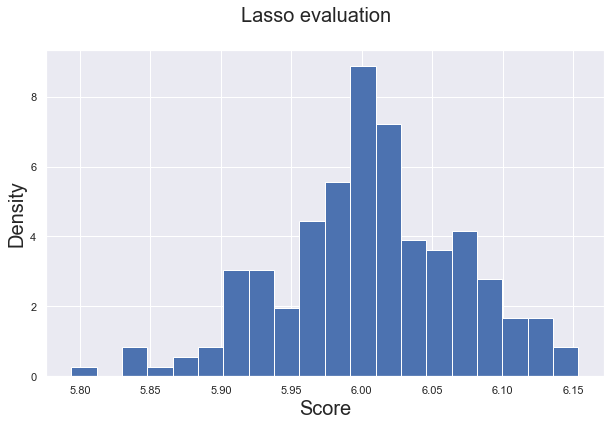

In [43]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

# _ = ax.hist(kmeans_scores, bins=15, density=True)

# fit Gaussian
# xs = np.linspace(np.min(kmeans_scores), np.max(kmeans_scores), 100)
# def gaussian(xs, data):
#     mu, sigma = np.mean(data), np.std(data)
#     prob = np.exp(-0.5*((xs - mu)/sigma)**2)
#     prob /= np.sqrt(2*np.pi*sigma**2)
#     return prob, mu, sigma

# gaussian_fit = gaussian(xs, kmeans_scores)
# ax.plot(xs, gaussian_fit[0], ls='-', lw=3.0)
# print('Mean: ', gaussian_fit[1])
# print('Standard deviation: ', gaussian_fit[2])

# mapear intervalo entre 0, 10

rescaled_kmeans_scores = kmeans_scores*0.3386079248416206
rescaled_kmeans_scores += 2.983220571058007 
rescaled_kmeans_scores *= 2

_ = ax.hist(rescaled_kmeans_scores, bins=20, density=True)

fig.suptitle('Lasso evaluation', fontsize=20)
ax.set_xlabel('Score', fontsize=20)
ax.set_ylabel('Density', fontsize=20)


print("Mean: ", np.mean(rescaled_kmeans_scores))
print("Standard deviation: ", np.std(rescaled_kmeans_scores))
print("Median: ", np.median(rescaled_kmeans_scores))

In [44]:
kmeans_scores2 = iterate_many_batches(num_batches=10, regressor=scoring_regressor2)

C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  1


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  2


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  3


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  4


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  5


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  6


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  7


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  8


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Finished batch  9
Finished batch  10


C:\Users\fcoel\AppData\Local\Temp/ipykernel_6380/25546309.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  total_scores[i:i+batch_size] = generate_scores(some_palettes, regressor=regressor)


Mean:  5.976538598325164
Standard deviation:  0.11161513469238901
Median:  5.971478277478443


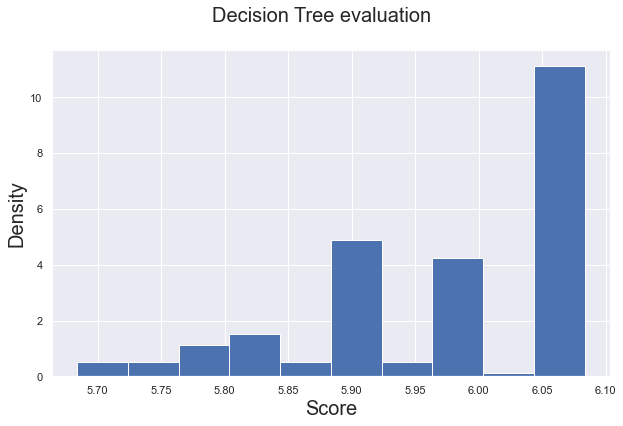

In [46]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()


# mapear intervalo entre 0, 10
rescaled_kmeans_scores2 = kmeans_scores2*0.3386079248416206
rescaled_kmeans_scores2 += 2.983220571058007 
rescaled_kmeans_scores2 *= 2

_ = ax.hist(rescaled_kmeans_scores2, bins=10, density=True)

fig.suptitle('Decision Tree evaluation', fontsize=20)
ax.set_xlabel('Score', fontsize=20)
ax.set_ylabel('Density', fontsize=20)

print("Mean: ", np.mean(rescaled_kmeans_scores2))
print("Standard deviation: ", np.std(rescaled_kmeans_scores2))
print("Median: ", np.median(rescaled_kmeans_scores2))